In [1]:
import os
import IPython
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import h5py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
with open('Trois_billes_Case3_k10_alfa00001.csv', 'r', encoding='utf-8-sig') as f:
    inputs1=np.genfromtxt(f, dtype=float, delimiter=',')

inputs=inputs1[1:,:]
print(inputs)

[[ 0.00000000e+00  2.00000000e+00  2.00000000e+00  1.00000000e+00
   3.00000000e+00]
 [ 5.00050005e-02  1.90209360e+00  1.99845780e+00  9.96916700e-01
   3.00000000e+00]
 [ 1.00010001e-01  1.61796010e+00  1.99383340e+00  9.87685860e-01
   3.00500100e+00]
 ...
 [ 4.99899990e+02  1.61796010e+00 -1.99383340e+00  9.87685860e-01
   3.39558430e+00]
 [ 4.99949995e+02  1.90209360e+00 -1.99845780e+00  9.96916700e-01
   3.41926400e+00]
 [ 5.00000000e+02  2.00000000e+00 -2.00000000e+00  1.00000000e+00
   3.42163870e+00]]


[[1.        ]
 [0.9969167 ]
 [0.98768586]
 ...
 [0.98768586]
 [0.9969167 ]
 [1.        ]]
(10000, 1)
[[3.       ]
 [3.       ]
 [3.005001 ]
 ...
 [3.3955843]
 [3.419264 ]
 [3.4216387]]


<function matplotlib.pyplot.show(close=None, block=None)>

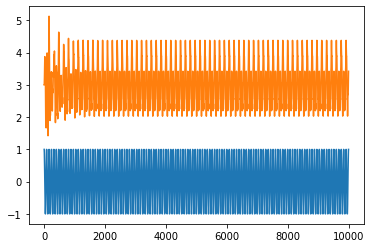

In [3]:
input_vect=np.expand_dims(inputs[:,3],axis=1)
output_vect=np.expand_dims(inputs[:,4],axis=1)
print(input_vect)
print(input_vect.shape)
print(output_vect)
plt.plot(input_vect)
plt.plot(output_vect)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

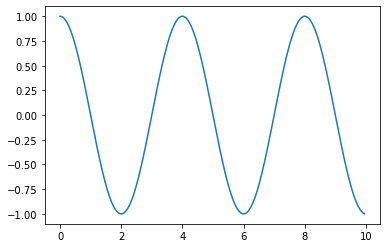

In [4]:
input1=np.expand_dims(inputs[:,0],axis=1)
input2=np.expand_dims(inputs[:,1],axis=1)
input3=np.expand_dims(inputs[:,2],axis=1)
input4=np.expand_dims(inputs[:,3],axis=1)
input5=np.expand_dims(inputs[:,4],axis=1)

plt.plot(input1[:200,:],input4[:200,:])
plt.show

In [5]:
time_inputs=3
train_size=np.int(np.round(input_vect.shape[0]*0.8))
print(train_size)

train_input_all=input_vect[:train_size,:]
test_input_all=input_vect[train_size:,:]

train_output_all=output_vect[:train_size,:]
test_output_all=output_vect[train_size:,:]

8000


/var/folders/qf/wpzcwshx6z1g26pymvwwnxdr0000gn/T/ipykernel_32630/4133277.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_size=np.int(np.round(input_vect.shape[0]*0.8))


[1.]
[-0.99999994]
[2.999791]
[3.7038845]
(2000, 1)
(2000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

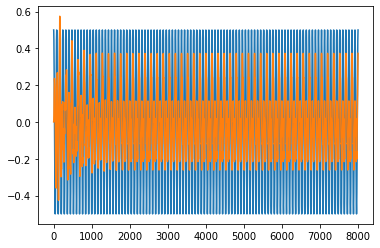

In [6]:
ci=np.mean(train_input_all,0)
cmaxi=np.max(train_input_all,0)
print(cmaxi)
cmini=np.min(train_input_all,0)
print(cmini)
cdenoi=cmaxi-cmini
train_input_all_n=(train_input_all-ci)/cdenoi
test_input_all_n=(test_input_all-ci)/cdenoi

c=np.mean(train_output_all,0)
cmax=np.max(train_output_all,0)
cmin=np.min(train_output_all,0)
cdeno=cmax-cmin
train_output_all_n=(train_output_all-c)/cdeno
test_output_all_n=(test_output_all-c)/cdeno

print(c)
print(cdeno)
print(test_input_all_n.shape)
print(test_output_all_n.shape)
plt.plot(train_input_all_n)
plt.plot(train_output_all_n)
plt.show

In [7]:
index=0
inputs_seq=np.zeros((train_input_all_n.shape[0]-time_inputs-1,time_inputs,train_input_all_n.shape[1]+train_output_all_n.shape[1]))
outputs_seq=np.zeros((train_output_all_n.shape[0]-time_inputs-1,train_output_all_n.shape[1]))
print(train_input_all_n[0:0+time_inputs+3,:])
print(train_output_all_n[0:0+time_inputs+3,:])
for j in range(train_output_all_n.shape[0]-time_inputs-1):
    inputs_seq[np.int(index),:,:]=np.concatenate((train_input_all_n[j+1:j+time_inputs+1,:],train_output_all_n[j:j+time_inputs,:]),axis=1)
    outputs_seq[np.int(index),:]=train_output_all_n[j+time_inputs,:]
    index=index+1

print(inputs_seq.shape)
print(outputs_seq.shape)
print(inputs_seq)
print(outputs_seq)

index=0
inputs_seq_t=np.zeros((test_input_all_n.shape[0]-time_inputs-1,time_inputs,test_input_all_n.shape[1]+test_output_all_n.shape[1]))
outputs_seq_t=np.zeros((test_output_all_n.shape[0]-time_inputs-1,test_output_all_n.shape[1]))
print(test_input_all_n[0:0+time_inputs+3,:])
print(test_output_all_n[0:0+time_inputs+3,:])
for j in range(test_output_all_n.shape[0]-time_inputs-1):
    inputs_seq_t[np.int(index),:,:]=np.concatenate((test_input_all_n[j+1:j+time_inputs+1,:],test_output_all_n[j:j+time_inputs,:]),axis=1)
    outputs_seq_t[np.int(index),:]=test_output_all_n[j+time_inputs,:]
    index=index+1

print(inputs_seq_t.shape)
print(outputs_seq_t.shape)
print(inputs_seq_t)
print(outputs_seq_t)


[[0.49995001]
 [0.49840836]
 [0.49379294]
 [0.48613221]
 [0.47547341]
 [0.46188226]]
[[5.64283457e-05]
 [5.64283457e-05]
 [1.40663244e-03]
 [4.21093154e-03]
 [8.61522655e-03]
 [1.47877192e-02]]
(7996, 3, 2)
(7996, 1)
[[[4.98408362e-01 5.64283457e-05]
  [4.93792942e-01 5.64283457e-05]
  [4.86132211e-01 1.40663244e-03]]

 [[4.93792942e-01 5.64283457e-05]
  [4.86132211e-01 1.40663244e-03]
  [4.75473411e-01 4.21093154e-03]]

 [[4.86132211e-01 1.40663244e-03]
  [4.75473411e-01 4.21093154e-03]
  [4.61882261e-01 8.61522655e-03]]

 ...

 [[4.58819211e-01 2.76868381e-01]
  [4.72987341e-01 3.02965712e-01]
  [4.84238461e-01 3.26586589e-01]]

 [[4.72987341e-01 3.02965712e-01]
  [4.84238461e-01 3.26586589e-01]
  [4.92503187e-01 3.46321005e-01]]

 [[4.84238461e-01 3.26586589e-01]
  [4.92503187e-01 3.46321005e-01]
  [4.97730542e-01 3.61022220e-01]]]
[[0.00421093]
 [0.00861523]
 [0.01478772]
 ...
 [0.34632101]
 [0.36102222]
 [0.36991488]]
[[0.49896316]
 [0.49496084]
 [0.48790601]
 [0.47784214]
 [0.464

/var/folders/qf/wpzcwshx6z1g26pymvwwnxdr0000gn/T/ipykernel_32630/318540985.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_seq[np.int(index),:,:]=np.concatenate((train_input_all_n[j+1:j+time_inputs+1,:],train_output_all_n[j:j+time_inputs,:]),axis=1)
/var/folders/qf/wpzcwshx6z1g26pymvwwnxdr0000gn/T/ipykernel_32630/318540985.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish

In [9]:
train_images=inputs_seq
test_images=inputs_seq_t
print(test_images.shape)
print(train_images.shape)

(1996, 3, 2)
(7996, 3, 2)


In [10]:
 def lstm_model(train_in,train_out,test_in,test_out,time_inputs):
    from keras.models import Sequential
    from keras.layers import Dense
    
    #for y in outputs.T:
    model = Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(time_inputs,train_images.shape[2])))
    #model.add(tf.keras.layers.Reshape((20,5), input_shape=(20,5,1)))
    #model.add(tf.keras.layers.LSTM(4, return_sequences=False,dropout=0.1, recurrent_dropout=0.1))
    #model.add(tf.keras.layers.Reshape((20,5,1), input_shape=(20,5)))
    model.add(tf.keras.layers.LSTM(1, return_sequences=False))
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(1, activation='linear'))
    print(model.summary())
    model.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.mean_absolute_error,tf.keras.metrics.mean_absolute_percentage_error])
    model.fit(train_in, train_out,epochs=1500,batch_size=100,shuffle=True,validation_data=(test_in, test_out))

    return model

In [11]:
print(time_inputs)
model=lstm_model(train_images,outputs_seq,test_images,outputs_seq_t,time_inputs)

3


2022-07-27 07:54:41.054048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 16        
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1500
80/80 [==============================] - 2s 7ms/step - loss: 0.0668 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1051.4438 - val_loss: 0.0566 - val_mean_absolute_error: 0.2064 - val_mean_absolute_percentage_error: 351.7708
Epoch 2/1500
80/80 [==============================] - 0s 2ms/ste

80/80 [==============================] - 0s 2ms/step - loss: 4.5968e-04 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 113.9742 - val_loss: 3.9687e-04 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 56.4238
Epoch 61/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.5231e-04 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 114.5791 - val_loss: 3.8899e-04 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 53.5140
Epoch 62/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.4623e-04 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 109.6304 - val_loss: 3.8304e-04 - val_mean_absolute_error: 0.0162 - val_mean_absolute_percentage_error: 51.3468
Epoch 63/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.3790e-04 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 110.7713 - val_loss: 3.7858e-04 - val_mean_absolute_error: 0.0160 - val_mean_a

80/80 [==============================] - 0s 2ms/step - loss: 1.7272e-04 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 67.5069 - val_loss: 1.5230e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 33.9702
Epoch 123/1500
80/80 [==============================] - 0s 2ms/step - loss: 1.6858e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.8157 - val_loss: 1.4711e-04 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 30.5296
Epoch 124/1500
80/80 [==============================] - 0s 2ms/step - loss: 1.6517e-04 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 61.6967 - val_loss: 1.4469e-04 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 30.3601
Epoch 125/1500
80/80 [==============================] - 0s 2ms/step - loss: 1.6295e-04 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.5745 - val_loss: 1.4427e-04 - val_mean_absolute_error: 0.0099 - val_mean_ab

80/80 [==============================] - 0s 2ms/step - loss: 5.6124e-05 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 41.4660 - val_loss: 4.9622e-05 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 19.6715
Epoch 185/1500
80/80 [==============================] - 0s 2ms/step - loss: 5.5545e-05 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 37.9151 - val_loss: 5.2952e-05 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 15.4211
Epoch 186/1500
80/80 [==============================] - 0s 2ms/step - loss: 5.3689e-05 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.1248 - val_loss: 4.7008e-05 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 17.2494
Epoch 187/1500
80/80 [==============================] - 0s 2ms/step - loss: 5.2543e-05 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 40.6645 - val_loss: 4.6620e-05 - val_mean_absolute_error: 0.0057 - val_mean_ab

80/80 [==============================] - 0s 2ms/step - loss: 2.2973e-05 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 18.6864 - val_loss: 2.0352e-05 - val_mean_absolute_error: 0.0038 - val_mean_absolute_percentage_error: 7.8667
Epoch 247/1500
80/80 [==============================] - 0s 2ms/step - loss: 2.2525e-05 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 14.9791 - val_loss: 1.9870e-05 - val_mean_absolute_error: 0.0037 - val_mean_absolute_percentage_error: 5.8627
Epoch 248/1500
80/80 [==============================] - 0s 2ms/step - loss: 2.2301e-05 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.8044 - val_loss: 1.9689e-05 - val_mean_absolute_error: 0.0037 - val_mean_absolute_percentage_error: 5.9001
Epoch 249/1500
80/80 [==============================] - 0s 2ms/step - loss: 2.2134e-05 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 14.1626 - val_loss: 1.9383e-05 - val_mean_absolute_error: 0.0037 - val_mean_absol

80/80 [==============================] - 0s 2ms/step - loss: 1.3178e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.8091 - val_loss: 1.0860e-05 - val_mean_absolute_error: 0.0028 - val_mean_absolute_percentage_error: 4.5563
Epoch 309/1500
80/80 [==============================] - 0s 2ms/step - loss: 1.2772e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 10.4141 - val_loss: 1.0873e-05 - val_mean_absolute_error: 0.0028 - val_mean_absolute_percentage_error: 5.1213
Epoch 310/1500
80/80 [==============================] - 0s 2ms/step - loss: 1.2890e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 10.1845 - val_loss: 1.0807e-05 - val_mean_absolute_error: 0.0028 - val_mean_absolute_percentage_error: 4.6034
Epoch 311/1500
80/80 [==============================] - 0s 2ms/step - loss: 1.2715e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.3510 - val_loss: 1.0598e-05 - val_mean_absolute_error: 0.0027 - val_mean_absol

80/80 [==============================] - 0s 2ms/step - loss: 8.0499e-06 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.0422 - val_loss: 6.4385e-06 - val_mean_absolute_error: 0.0021 - val_mean_absolute_percentage_error: 6.0091
Epoch 371/1500
80/80 [==============================] - 0s 2ms/step - loss: 7.9385e-06 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 9.7588 - val_loss: 5.9923e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_percentage_error: 4.6368
Epoch 372/1500
80/80 [==============================] - 0s 2ms/step - loss: 7.8480e-06 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.2189 - val_loss: 6.5577e-06 - val_mean_absolute_error: 0.0021 - val_mean_absolute_percentage_error: 5.6714
Epoch 373/1500
80/80 [==============================] - 0s 2ms/step - loss: 7.8309e-06 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.6092 - val_loss: 5.9143e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolu

80/80 [==============================] - 0s 2ms/step - loss: 6.4196e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 11.2682 - val_loss: 4.5206e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 4.8223
Epoch 433/1500
80/80 [==============================] - 0s 2ms/step - loss: 6.4043e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 14.7142 - val_loss: 4.4788e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 5.6902
Epoch 434/1500
80/80 [==============================] - 0s 2ms/step - loss: 6.2817e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 13.6236 - val_loss: 4.8460e-06 - val_mean_absolute_error: 0.0018 - val_mean_absolute_percentage_error: 3.5889
Epoch 435/1500
80/80 [==============================] - 0s 2ms/step - loss: 6.3035e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 13.9580 - val_loss: 4.9901e-06 - val_mean_absolute_error: 0.0019 - val_mean_absol

80/80 [==============================] - 0s 2ms/step - loss: 5.6434e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 14.7907 - val_loss: 4.2195e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 5.6194
Epoch 495/1500
80/80 [==============================] - 0s 2ms/step - loss: 5.6030e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 13.7942 - val_loss: 3.9449e-06 - val_mean_absolute_error: 0.0016 - val_mean_absolute_percentage_error: 4.3944
Epoch 496/1500
80/80 [==============================] - 0s 2ms/step - loss: 5.4252e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 14.1877 - val_loss: 4.2502e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 5.3366
Epoch 497/1500
80/80 [==============================] - 0s 2ms/step - loss: 5.5349e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 12.4127 - val_loss: 4.5963e-06 - val_mean_absolute_error: 0.0018 - val_mean_absol

80/80 [==============================] - 0s 2ms/step - loss: 5.2468e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 14.7600 - val_loss: 4.6267e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 3.8625
Epoch 557/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.9995e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 12.0463 - val_loss: 3.5765e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 4.6953
Epoch 558/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.9888e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 13.7814 - val_loss: 3.7664e-06 - val_mean_absolute_error: 0.0016 - val_mean_absolute_percentage_error: 5.0145
Epoch 559/1500
80/80 [==============================] - 0s 2ms/step - loss: 5.0554e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 9.7721 - val_loss: 3.5899e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolu

80/80 [==============================] - 0s 2ms/step - loss: 4.6431e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 12.2874 - val_loss: 3.3972e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 4.7853
Epoch 619/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.6152e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 11.7477 - val_loss: 3.4265e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 4.9289
Epoch 620/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.6274e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 11.6180 - val_loss: 3.2971e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 4.5310
Epoch 621/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.6208e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 13.3872 - val_loss: 3.6087e-06 - val_mean_absolute_error: 0.0015 - val_mean_absol

80/80 [==============================] - 0s 2ms/step - loss: 4.2551e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 11.2648 - val_loss: 3.1706e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.3535
Epoch 681/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.2773e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 11.9227 - val_loss: 3.1879e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 3.6913
Epoch 682/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.2753e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 7.9733 - val_loss: 3.3782e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 3.7267
Epoch 683/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.2370e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 10.0472 - val_loss: 3.4036e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolu

80/80 [==============================] - 0s 2ms/step - loss: 4.0161e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.2376 - val_loss: 3.2336e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 3.5081
Epoch 743/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.0060e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 8.1741 - val_loss: 3.0309e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.5667
Epoch 744/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.0461e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.3032 - val_loss: 2.9881e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 3.9818
Epoch 745/1500
80/80 [==============================] - 0s 2ms/step - loss: 3.9968e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 8.0801 - val_loss: 3.2695e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolut

80/80 [==============================] - 0s 2ms/step - loss: 3.8475e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 8.9666 - val_loss: 2.8084e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 3.6945
Epoch 805/1500
80/80 [==============================] - 0s 2ms/step - loss: 3.7770e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 9.0630 - val_loss: 3.2615e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 5.6596
Epoch 806/1500
80/80 [==============================] - 0s 2ms/step - loss: 4.1434e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 12.9855 - val_loss: 2.7970e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.2494
Epoch 807/1500
80/80 [==============================] - 0s 2ms/step - loss: 3.7776e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 9.1140 - val_loss: 2.7968e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute

80/80 [==============================] - 0s 6ms/step - loss: 3.6896e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 8.9107 - val_loss: 3.1993e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 4.6163
Epoch 867/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.6242e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 8.7219 - val_loss: 2.7257e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 4.0104
Epoch 868/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.6247e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 9.5532 - val_loss: 2.7311e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 3.2302
Epoch 869/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.5843e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 8.0205 - val_loss: 2.8075e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 3.4626e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 8.8139 - val_loss: 2.6361e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 4.0205
Epoch 929/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.4583e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 9.2035 - val_loss: 2.6168e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 4.1212
Epoch 930/1500
80/80 [==============================] - 0s 4ms/step - loss: 3.4031e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 6.8923 - val_loss: 2.7029e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 2.8892
Epoch 931/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.4641e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 6.6126 - val_loss: 2.8676e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 3.3563e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 7.4170 - val_loss: 2.4736e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 2.9036
Epoch 991/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.2738e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 7.6890 - val_loss: 2.4788e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 3.8527
Epoch 992/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.2258e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 7.2399 - val_loss: 2.4194e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.9114
Epoch 993/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.2747e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 6.8147 - val_loss: 3.0388e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_

80/80 [==============================] - 1s 8ms/step - loss: 3.0925e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.1124 - val_loss: 2.5220e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 3.8949
Epoch 1053/1500
80/80 [==============================] - 1s 8ms/step - loss: 3.1689e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 7.0755 - val_loss: 2.4718e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.7761
Epoch 1054/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.1374e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 6.9106 - val_loss: 2.3483e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.7655
Epoch 1055/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.1506e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 7.0052 - val_loss: 2.9339e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolu

80/80 [==============================] - 0s 6ms/step - loss: 2.9379e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 7.5561 - val_loss: 2.2470e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.9318
Epoch 1115/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.9696e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.4615 - val_loss: 2.2955e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 3.0690
Epoch 1116/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.9833e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.7600 - val_loss: 2.2284e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.9379
Epoch 1117/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.0172e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 7.0766 - val_loss: 2.2515e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolu

80/80 [==============================] - 1s 7ms/step - loss: 2.8432e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.2270 - val_loss: 2.2064e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 3.2121
Epoch 1177/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.8373e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.2147 - val_loss: 2.1663e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.6616
Epoch 1178/1500
80/80 [==============================] - 1s 6ms/step - loss: 2.9004e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 5.6207 - val_loss: 2.4631e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 2.9218
Epoch 1179/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.9076e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.5488 - val_loss: 2.1900e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolu

80/80 [==============================] - 0s 3ms/step - loss: 2.8050e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.5783 - val_loss: 2.0886e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.3747
Epoch 1239/1500
80/80 [==============================] - 0s 3ms/step - loss: 2.8616e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 8.4949 - val_loss: 2.0422e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.6649
Epoch 1240/1500
80/80 [==============================] - 0s 3ms/step - loss: 2.7659e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 5.6083 - val_loss: 2.0799e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.8143
Epoch 1241/1500
80/80 [==============================] - 0s 3ms/step - loss: 2.7812e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 5.7583 - val_loss: 2.1248e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolu

80/80 [==============================] - 1s 7ms/step - loss: 2.6404e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.9802 - val_loss: 2.1298e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.3722
Epoch 1301/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.6720e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 6.5056 - val_loss: 1.9687e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.4473
Epoch 1302/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.5905e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 4.2967 - val_loss: 1.9801e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.6828
Epoch 1303/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.6380e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.3103 - val_loss: 2.4519e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolu

80/80 [==============================] - 1s 8ms/step - loss: 2.5173e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.3322 - val_loss: 2.0528e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.4364
Epoch 1363/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.5463e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.5521 - val_loss: 2.1063e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 3.3541
Epoch 1364/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.5328e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 4.5043 - val_loss: 1.9101e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.3722
Epoch 1365/1500
80/80 [==============================] - 1s 6ms/step - loss: 2.5888e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 4.9048 - val_loss: 2.1302e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolu

80/80 [==============================] - 1s 7ms/step - loss: 2.4551e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 6.6823 - val_loss: 1.8130e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.1270
Epoch 1425/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.4003e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.3961 - val_loss: 1.9221e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.5698
Epoch 1426/1500
80/80 [==============================] - 1s 6ms/step - loss: 2.4245e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.5809 - val_loss: 1.8009e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.0920
Epoch 1427/1500
80/80 [==============================] - 1s 6ms/step - loss: 2.4519e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.1312 - val_loss: 2.0846e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolu

80/80 [==============================] - 1s 7ms/step - loss: 2.3385e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.1281 - val_loss: 1.8409e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.5200
Epoch 1487/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.3626e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 6.3594 - val_loss: 1.7255e-06 - val_mean_absolute_error: 0.0010 - val_mean_absolute_percentage_error: 1.9140
Epoch 1488/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.2680e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 4.2563 - val_loss: 1.8146e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.0286
Epoch 1489/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.3496e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 6.7918 - val_loss: 2.0412e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolu

63/63 [==============================] - 0s 3ms/step
(7996, 1)
(1996, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

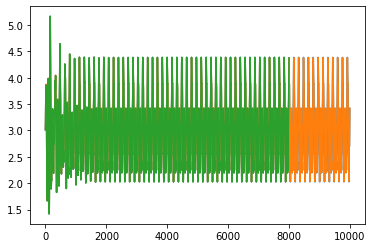

In [12]:
out_1=model.predict(train_images)
out_2=model.predict(test_images)
print(out_1.shape)
print(out_2.shape)
out_all=np.concatenate((out_1,out_2),axis=0)
out_all_original=np.concatenate((outputs_seq,outputs_seq_t),axis=0)
plt.plot(out_all*cdeno+c)
plt.plot(out_all_original*cdeno+c)
plt.plot(out_1*cdeno+c)
plt.show

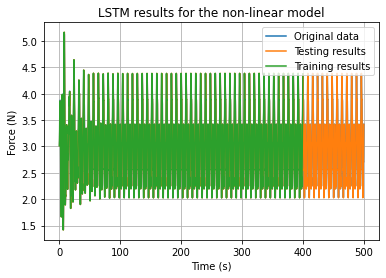

In [13]:
plt.title("LSTM results for the non-linear model")
plt.plot(inputs[8:,0],out_all_original*cdeno+c)
plt.plot(inputs[8:,0],out_all*cdeno+c)
plt.plot(inputs[4:8000,0],out_1*cdeno+c)
plt.legend(['Original data','Testing results','Training results'])
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.grid()
plt.show()
plt.close()

In [22]:
print(np.mean((np.abs(out_all[:8000]*cdeno+c-(out_all_original[:8000]*cdeno+c)))/(np.abs(out_all_original[:8000]*cdeno+c))))

0.001525429670220669


In [23]:
print(np.mean((np.abs(out_all[8000:]*cdeno+c-(out_all_original[8000:]*cdeno+c)))/(np.abs(out_all_original[8000:]*cdeno+c))))

0.0014191147460728712


In [25]:
 def rnn_model(train_in,train_out,test_in,test_out,time_inputs):
    from keras.models import Sequential
    from keras.layers import Dense
    
    #for y in outputs.T:
    model = Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(time_inputs,train_images.shape[2])))
    #model.add(tf.keras.layers.Reshape((20,5), input_shape=(20,5,1)))
    #model.add(tf.keras.layers.LSTM(4, return_sequences=False,dropout=0.1, recurrent_dropout=0.1))
    #model.add(tf.keras.layers.Reshape((20,5,1), input_shape=(20,5)))
    model.add(tf.keras.layers.SimpleRNN(1, return_sequences=False))
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(1, activation='linear'))
    print(model.summary())
    model.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.mean_absolute_error,tf.keras.metrics.mean_absolute_percentage_error])
    model.fit(train_in, train_out,epochs=1500,batch_size=100,shuffle=True,validation_data=(test_in, test_out))

    return model

In [26]:
model_rnn=rnn_model(train_images,outputs_seq,test_images,outputs_seq_t,time_inputs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1)                 4         
                                                                 
 flatten_2 (Flatten)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1500
80/80 [==============================] - 4s 14ms/step - loss: 0.8039 - mean_absolute_error: 0.8141 - mean_absolute_percentage_error: 6472.6538 - val_loss: 0.7159 - val_mean_absolute_error: 0.7663 - val_mean_absolute_percentage_error: 2128.0398
Epoch 2/1500
80/80 [==============================] - 0s 6ms/s

Epoch 30/1500
80/80 [==============================] - 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 309.3846 - val_loss: 0.0108 - val_mean_absolute_error: 0.0871 - val_mean_absolute_percentage_error: 129.9711
Epoch 31/1500
80/80 [==============================] - 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 330.9559 - val_loss: 0.0093 - val_mean_absolute_error: 0.0812 - val_mean_absolute_percentage_error: 149.6344
Epoch 32/1500
80/80 [==============================] - 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 409.1766 - val_loss: 0.0079 - val_mean_absolute_error: 0.0746 - val_mean_absolute_percentage_error: 155.3822
Epoch 33/1500
80/80 [==============================] - 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 450.7474 - val_loss: 0.0068 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percent

80/80 [==============================] - 1s 7ms/step - loss: 8.5112e-04 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 425.0356 - val_loss: 7.2605e-04 - val_mean_absolute_error: 0.0224 - val_mean_absolute_percentage_error: 136.8214
Epoch 63/1500
80/80 [==============================] - 0s 6ms/step - loss: 7.9044e-04 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 414.7626 - val_loss: 6.7573e-04 - val_mean_absolute_error: 0.0214 - val_mean_absolute_percentage_error: 136.7591
Epoch 64/1500
80/80 [==============================] - 0s 5ms/step - loss: 7.2926e-04 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 392.2180 - val_loss: 6.2202e-04 - val_mean_absolute_error: 0.0207 - val_mean_absolute_percentage_error: 124.2648
Epoch 65/1500
80/80 [==============================] - 0s 5ms/step - loss: 6.7592e-04 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 366.6230 - val_loss: 5.7660e-04 - val_mean_absolute_error: 0.0199 - val_mea

80/80 [==============================] - 1s 6ms/step - loss: 1.7292e-04 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 94.5724 - val_loss: 1.6058e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 40.6900
Epoch 125/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.7163e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 92.8589 - val_loss: 1.5949e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 39.1061
Epoch 126/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.7146e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 93.9038 - val_loss: 1.5918e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 38.1577
Epoch 127/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.7113e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 93.0083 - val_loss: 1.5975e-04 - val_mean_absolute_error: 0.0103 - val_mean_ab

80/80 [==============================] - 0s 5ms/step - loss: 1.6809e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.5852 - val_loss: 1.5515e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.3077
Epoch 187/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6764e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.7216 - val_loss: 1.5516e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.5826
Epoch 188/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6795e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 92.5722 - val_loss: 1.5543e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.8059
Epoch 189/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6788e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.6164 - val_loss: 1.5595e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 0s 5ms/step - loss: 1.6693e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.4709 - val_loss: 1.5529e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.1064
Epoch 249/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.6767e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 90.3154 - val_loss: 1.6150e-04 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 32.8997
Epoch 250/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.6861e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 78.1950 - val_loss: 1.5590e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.9570
Epoch 251/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6710e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.7281 - val_loss: 1.5822e-04 - val_mean_absolute_error: 0.0103 - val_mean_ab

80/80 [==============================] - 0s 6ms/step - loss: 1.6821e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 88.4251 - val_loss: 1.5597e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 40.5408
Epoch 311/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6744e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.9136 - val_loss: 1.5558e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 39.4665
Epoch 312/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6767e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 82.0175 - val_loss: 1.5495e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.4808
Epoch 313/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6847e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 82.6335 - val_loss: 1.5628e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 1s 10ms/step - loss: 1.6714e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.2464 - val_loss: 1.5637e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 39.4707
Epoch 373/1500
80/80 [==============================] - 1s 9ms/step - loss: 1.6686e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 90.5205 - val_loss: 1.5724e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.1628
Epoch 374/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.6787e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 88.3673 - val_loss: 1.5511e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.7059
Epoch 375/1500
80/80 [==============================] - 1s 11ms/step - loss: 1.6704e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.3881 - val_loss: 1.5621e-04 - val_mean_absolute_error: 0.0102 - val_mean_

80/80 [==============================] - 0s 5ms/step - loss: 1.6780e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 92.8740 - val_loss: 1.5458e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.8499
Epoch 435/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6722e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 82.2365 - val_loss: 1.6127e-04 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 34.1750
Epoch 436/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6734e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 90.2564 - val_loss: 1.5505e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 39.1555
Epoch 437/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6684e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.3653 - val_loss: 1.5571e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 1.6802e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 81.5745 - val_loss: 1.5526e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 39.5427
Epoch 497/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6733e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 93.3696 - val_loss: 1.5480e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.5178
Epoch 498/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6712e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 92.2556 - val_loss: 1.5737e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 34.4137
Epoch 499/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6702e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 81.7781 - val_loss: 1.5462e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 0s 6ms/step - loss: 1.6676e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.0438 - val_loss: 1.5520e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.4941
Epoch 559/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6754e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 85.4613 - val_loss: 1.5452e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.1860
Epoch 560/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6760e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.9797 - val_loss: 1.5506e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.0074
Epoch 561/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6707e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.7021 - val_loss: 1.5663e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 0s 5ms/step - loss: 1.6811e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 86.7730 - val_loss: 1.5434e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.0102
Epoch 621/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6744e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.2799 - val_loss: 1.5712e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 34.8999
Epoch 622/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6818e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 91.1926 - val_loss: 1.5486e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.5532
Epoch 623/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6665e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.5487 - val_loss: 1.5652e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 0s 5ms/step - loss: 1.6720e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 87.2243 - val_loss: 1.5468e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.1701
Epoch 683/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6696e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.3780 - val_loss: 1.5436e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.2171
Epoch 684/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6710e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 80.5660 - val_loss: 1.5580e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.7297
Epoch 685/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6726e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.8174 - val_loss: 1.5551e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 0s 6ms/step - loss: 1.6683e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 90.2481 - val_loss: 1.5447e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.3045
Epoch 745/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6687e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 80.8539 - val_loss: 1.5975e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 42.6978
Epoch 746/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.6849e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 86.6975 - val_loss: 1.5460e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.9464
Epoch 747/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.6717e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.8060 - val_loss: 1.5431e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 0s 6ms/step - loss: 1.6692e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.5342 - val_loss: 1.5614e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 39.8282
Epoch 807/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6711e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.3859 - val_loss: 1.5487e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.3455
Epoch 808/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6749e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 85.1522 - val_loss: 1.5424e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.6188
Epoch 809/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6662e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.1920 - val_loss: 1.5455e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 1.6699e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 91.9464 - val_loss: 1.5748e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 33.1981
Epoch 869/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.6678e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.8938 - val_loss: 1.5563e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.4796
Epoch 870/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6624e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.9694 - val_loss: 1.5558e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.3032
Epoch 871/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6740e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.0688 - val_loss: 1.5878e-04 - val_mean_absolute_error: 0.0103 - val_mean_ab

80/80 [==============================] - 0s 5ms/step - loss: 1.6677e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.7231 - val_loss: 1.5425e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.5496
Epoch 931/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6700e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.0779 - val_loss: 1.5556e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.5673
Epoch 932/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6732e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 91.3918 - val_loss: 1.5448e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.7050
Epoch 933/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6656e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.1881 - val_loss: 1.5595e-04 - val_mean_absolute_error: 0.0102 - val_mean_ab

80/80 [==============================] - 0s 5ms/step - loss: 1.6748e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 97.6528 - val_loss: 1.5472e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.2056
Epoch 993/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6707e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 91.1655 - val_loss: 1.5539e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.7561
Epoch 994/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6677e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 84.9359 - val_loss: 1.5557e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 40.9942
Epoch 995/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6699e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 90.3767 - val_loss: 1.5727e-04 - val_mean_absolute_error: 0.0103 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 1.6698e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.4589 - val_loss: 1.5556e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.0839
Epoch 1055/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6903e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 95.7093 - val_loss: 1.6112e-04 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 34.5086
Epoch 1056/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.6734e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 80.4653 - val_loss: 1.5462e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.0787
Epoch 1057/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6660e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.5954 - val_loss: 1.5498e-04 - val_mean_absolute_error: 0.0102 - val_mean

80/80 [==============================] - 0s 5ms/step - loss: 1.6709e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.4759 - val_loss: 1.5489e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.1659
Epoch 1117/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6636e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.8284 - val_loss: 1.5587e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 39.0626
Epoch 1118/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6705e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.5060 - val_loss: 1.5659e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 40.5546
Epoch 1119/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6784e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 92.7113 - val_loss: 1.5606e-04 - val_mean_absolute_error: 0.0102 - val_mean

80/80 [==============================] - 0s 5ms/step - loss: 1.6696e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 92.0723 - val_loss: 1.5705e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 40.6642
Epoch 1179/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6719e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.9763 - val_loss: 1.5509e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.6490
Epoch 1180/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6687e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 84.3208 - val_loss: 1.5550e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.9586
Epoch 1181/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6742e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.4922 - val_loss: 1.5518e-04 - val_mean_absolute_error: 0.0102 - val_mean

80/80 [==============================] - 0s 6ms/step - loss: 1.6846e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 88.7062 - val_loss: 1.5945e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 42.7868
Epoch 1241/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6736e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 83.1185 - val_loss: 1.5509e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 39.6050
Epoch 1242/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6678e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.4501 - val_loss: 1.5547e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.2847
Epoch 1243/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6703e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.5183 - val_loss: 1.5622e-04 - val_mean_absolute_error: 0.0102 - val_mean

80/80 [==============================] - 0s 6ms/step - loss: 1.6685e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.4773 - val_loss: 1.5462e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.3456
Epoch 1303/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6740e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 90.0370 - val_loss: 1.5441e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 35.8264
Epoch 1304/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6650e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.5140 - val_loss: 1.5503e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.2007
Epoch 1305/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6721e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 91.1596 - val_loss: 1.5455e-04 - val_mean_absolute_error: 0.0102 - val_mean

80/80 [==============================] - 0s 4ms/step - loss: 1.6637e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 90.0981 - val_loss: 1.5638e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 33.6865
Epoch 1365/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.6687e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.3830 - val_loss: 1.5495e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 38.3119
Epoch 1366/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.6730e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 81.4415 - val_loss: 1.5495e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.1792
Epoch 1367/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.6712e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 80.7816 - val_loss: 1.5548e-04 - val_mean_absolute_error: 0.0102 - val_mean

80/80 [==============================] - 0s 5ms/step - loss: 1.6668e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.7910 - val_loss: 1.5401e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 36.8967
Epoch 1427/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6675e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.9284 - val_loss: 1.5768e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 40.4372
Epoch 1428/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6686e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 82.3809 - val_loss: 1.5829e-04 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 42.6918
Epoch 1429/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6635e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 86.2650 - val_loss: 1.5396e-04 - val_mean_absolute_error: 0.0102 - val_mean

80/80 [==============================] - 0s 5ms/step - loss: 1.6678e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.4371 - val_loss: 1.5426e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.0191
Epoch 1489/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.6691e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 83.4454 - val_loss: 1.5714e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 41.7020
Epoch 1490/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.6735e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 93.7077 - val_loss: 1.5432e-04 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 37.9600
Epoch 1491/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.6673e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 82.9139 - val_loss: 1.5802e-04 - val_mean_absolute_error: 0.0103 - val_mean

63/63 [==============================] - 0s 2ms/step
(7996, 1)
(1996, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

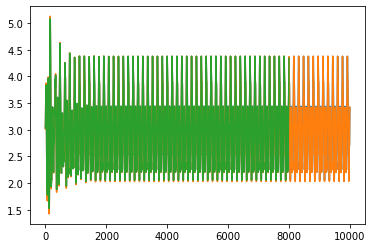

In [28]:
out_1=model_rnn.predict(train_images)
out_2=model_rnn.predict(test_images)
print(out_1.shape)
print(out_2.shape)
out_all=np.concatenate((out_1,out_2),axis=0)
out_all_original=np.concatenate((outputs_seq,outputs_seq_t),axis=0)
plt.plot(out_all*cdeno+c)
plt.plot(out_all_original*cdeno+c)
plt.plot(out_1*cdeno+c)
plt.show

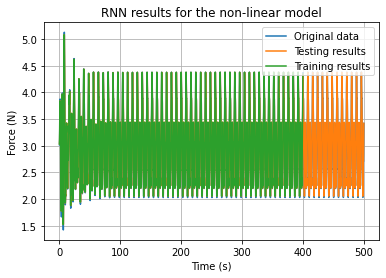

In [29]:
plt.title("RNN results for the non-linear model")
plt.plot(inputs[8:,0],out_all_original*cdeno+c)
plt.plot(inputs[8:,0],out_all*cdeno+c)
plt.plot(inputs[4:8000,0],out_1*cdeno+c)
plt.legend(['Original data','Testing results','Training results'])
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.grid()
plt.show()
plt.close()

In [30]:
print(np.mean((np.abs(out_all[:8000]*cdeno+c-(out_all_original[:8000]*cdeno+c)))/(np.abs(out_all_original[:8000]*cdeno+c))))

0.013413897690705221


In [31]:
print(np.mean((np.abs(out_all[8000:]*cdeno+c-(out_all_original[8000:]*cdeno+c)))/(np.abs(out_all_original[8000:]*cdeno+c))))

0.01293011077426456
